KNN 복습

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
from sklearn.datasets import load_diabetes

In [47]:
diabetes = load_diabetes()

In [52]:
X = diabetes.data
y = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [54]:
#훈련 셋, 테스트 셋 나누기 (random_state = 77, 70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 77, test_size = 0.3)

In [56]:
#knn 적용 (K=2, n_jobs = -1), 학습 결과와 테스트 결과 확인
model = KNeighborsRegressor(n_neighbors = 2, n_jobs = -1).fit(X_train, y_train)
print('학습결과:',model.score(X_train,y_train))
print('테스트결과:',model.score(X_test,y_test))

0.7440088688183109
0.22298199492234472


In [59]:
k = np.arange(1,20)
train_result = np.zeros(len(k))
test_result = np.zeros(len(k))
for i, j in enumerate(k):
  model = KNeighborsRegressor(n_neighbors = j, n_jobs = -1).fit(X_train, y_train)
  train_result[i] = model.score(X_train, y_train)
  test_result[i] = model.score(X_test, y_test)
print('학습 결과 최대:', train_result.max())
print('학습 결과 최대의 k값', k[np.where(train_result == train_result.max())])
print('테스트 결과 최대:', test_result.max())
print('테스트 결과 최대의 k값', k[np.where(test_result == test_result.max())])


학습 결과 최대: 1.0
학습 결과 최대의 k값 [1]
테스트 결과 최대: 0.4628069065111493
테스트 결과 최대의 k값 [17]


다항회귀 복습

In [17]:
from sklearn.linear_model import Ridge, Lasso
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [18]:
#alpha에 증가에 따른 가중치 계수 확인
alpha = [0.001,0.01,0.1,1,10]
data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [19]:
alpha = [0.001,0.01,0.1,1,10]

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


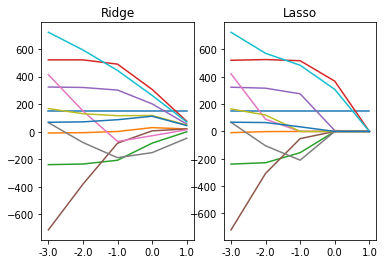

In [20]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

plt.show()

In [ ]:
files.upload()

In [22]:
car = pd.read_csv('UK_car.csv')

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99136 entries, 0 to 99135
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         99136 non-null  object 
 1   model         99136 non-null  object 
 2   year          99136 non-null  int64  
 3   price         99136 non-null  int64  
 4   transmission  99136 non-null  object 
 5   mileage       99136 non-null  int64  
 6   fuelType      99136 non-null  object 
 7   mpg           99136 non-null  float64
 8   engineSize    99136 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.8+ MB


In [24]:
car = pd.get_dummies(car, columns=['brand', 'model', 'year', 'transmission','fuelType'])

In [ ]:
y_target = car['price']
# 피처 데이터
X_features = car.drop('price', axis=1)

# test_split_split()으로 train,test set 분리 (70:30, random_state = 77)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=77)

In [ ]:
from sklearn.metrics import r2_score
# LinearRegression() 모델로 학습
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
# LinearRegression() 모델로 예측
y_preds = linear_reg.predict(X_test)
#mse, rmse, r^2 구하기
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_preds)

print('MSE : {0:.3f}, RMSE : {1:.4f}'.format(mse, rmse))
print('R_Square : {0:.3f}'.format(r_square))

MSE : 12525152.688, RMSE : 3539.0892
R_Square : 0.872


In [ ]:
# Ridge() 모델로 학습
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
# Ridge() 모델로 예측
y_preds = ridge.predict(X_test)
#mse, rmse, r^2 구하기
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_preds)

print('MSE : {0:.3f}, RMSE : {1:.4f}'.format(mse, rmse))
print('R_Square : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 12525244.287, RMSE : 3539.1022
R_Square : 0.872


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.02384e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
# Lasso() 모델로 학습
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
# Lasso() 모델로 예측
y_preds = lasso.predict(X_test)
#mse, rmse, r^2 구하기
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_preds)

print('MSE : {0:.3f}, RMSE : {1:.4f}'.format(mse, rmse))
print('R_Square : {0:.3f}'.format(r_square))

MSE : 12524706.635, RMSE : 3539.0262
R_Square : 0.872


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.400e+11, tolerance: 6.696e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# cross_val_score()함수로 K-Fold 검증, R_sqaure값 확인

# alpha값 적용
alphas = [0.001, 0.01, 0.1, 1,10]
for alpha in alphas :
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # Ridge() 모델로 예측
    y_preds = ridge.predict(X_test)
    #mse, rmse, r^2 구하기
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r_square = r2_score(y_test, y_preds)

    # cross_val_score 값 출력
    print('Ridge alpha : {0}, RMSE : {1:.4f}'.format(alpha, rmse))
    print('Ridge alpha : {0}, r2_score : {1:.3f}'.format(alpha, r_square))

print('---------------------------------------------')

# alpha값 적용
alphas = [0.001, 0.01, 0.1, 1,10]
for alpha in alphas :
    lasso = Lasso(alpha=alpha)

    # Lasso() 모델로 학습
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    # Lasso() 모델로 예측
    y_preds = lasso.predict(X_test)
    #mse, rmse, r^2 구하기
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r_square = r2_score(y_test, y_preds)

    # cross_val_score 값 출력
    print('Lasso alpha : {0}, RMSE : {1:.4f}'.format(alpha, rmse))
    print('Lasso alpha : {0}, r2_score : {1:.3f}'.format(alpha, r_square))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.02384e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge alpha : 0.001, RMSE : 3539.1022
Ridge alpha : 0.001, r2_score : 0.872
Ridge alpha : 0.01, RMSE : 3539.2187
Ridge alpha : 0.01, r2_score : 0.872
Ridge alpha : 0.1, RMSE : 3540.3900
Ridge alpha : 0.1, r2_score : 0.872
Ridge alpha : 1, RMSE : 3552.1917
Ridge alpha : 1, r2_score : 0.871
Ridge alpha : 10, RMSE : 3645.2193
Ridge alpha : 10, r2_score : 0.864
---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.076e+11, tolerance: 6.696e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso alpha : 0.001, RMSE : 3539.0506
Lasso alpha : 0.001, r2_score : 0.872


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.029e+11, tolerance: 6.696e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso alpha : 0.01, RMSE : 3539.3503
Lasso alpha : 0.01, r2_score : 0.872


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.300e+11, tolerance: 6.696e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso alpha : 0.1, RMSE : 3542.6121
Lasso alpha : 0.1, r2_score : 0.872


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.102e+11, tolerance: 6.696e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso alpha : 1, RMSE : 3592.9233
Lasso alpha : 1, r2_score : 0.868
Lasso alpha : 10, RMSE : 4177.4682
Lasso alpha : 10, r2_score : 0.821


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

alpha = [0.001, 0.01, 0.1, 1,10]
# 최적의 alpha값을 찾아내기
ridgecv = RidgeCV(alphas=alpha, cv=5)
#fit과 predict 진행
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)
#mae, r^2구하기
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}')
print(f'alpha: {ridgecv.alpha_}')

Test MAE: 2,204
R2 Score: 0.8709

alpha: 1.0


In [ ]:
from sklearn.linear_model import LassoCV
alpha = [0.001, 0.01, 0.1, 1,10]

# 최적의 alpha값을 찾아내기
lassocv = LassoCV(alphas=alpha, cv=5)
#fit과 predict 진행
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)
#mae, r^2구하기
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}')
print(f'alpha: {lassocv.alpha_}') # 최종 결정된 alpha값

Test MAE: 2,203
R2 Score: 0.8716
alpha: 0.1


In [ ]:
# Ridge와 Lasso모델 결합한 결과
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
#릿지에 0.7, 라쏘에 0.3 곱해줘서 mse,rmse구하기
pred = 0.7*ridge_pred + 0.3*lasso_pred
res_mse = mean_squared_error(y_test, pred)
res_rmse = np.sqrt(res_mse)

print('Ridge와 Lasso를 7:3 비율로 결합해 예측한 RMSE값 : ', np.round(res_rmse,4))

Ridge와 Lasso를 7:3 비율로 결합해 예측한 RMSE값 :  3548.9911


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
neg_mse = cross_val_score(linear_reg, X_features, y_target, scoring='neg_mean_squared_error', cv=5)
r2_score = cross_val_score(linear_reg, X_features, y_target, scoring='r2', cv=5)
rmse = np.sqrt(-1*neg_mse)
avg_rmse = np.mean(rmse)
avg_r2_score = np.mean(r2_score)

# cross_val_score 값 출력
print('Linear_regression RMSE : {0:.3f}'.format(avg_rmse))

Linear_regression RMSE : 5778.247


In [ ]:
import plotly.graph_objects as go
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
# 회귀 계수 값 시각화
df = pd.DataFrame()
coef = pd.Series(data=ridge_model.coef_, index=X_features.columns)
df['coef'] = coef
coef = coef.sort_values(ascending=True)
fig = go.Figure(go.Bar(x=coef.values, y=coef.index, orientation='h'))
fig.show()

In [ ]:
# Lasso : 최적 alpha값으로 setting
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
# 회귀 계수 값 시각화
df = pd.DataFrame()
coef = pd.Series(data=lasso_model.coef_, index=X_features.columns)
df['coef'] = coef
coef = coef.sort_values(ascending=True)
fig = go.Figure(go.Bar(x=coef.values, y=coef.index, orientation='h'))
fig.show()